Awal Mulanya Dataset dikumpulkan terlebih dahulu selama periode 2016 - 2018 di daerah Makassar. Data feature dicrawling dari website http://weather.uwyo.edu/upperair/sounding.html. Dari web ini didapatkan data udara atas beserta hasil olahan berupa index-index labilitas atmosfer. Feature yang di extract dari web ini adalah index-index labilitas berupa CAPE, KI, LI, VT, dan SI. Sementara untuk data label di crawling dari API BMKG di http://aviation.bmkg.go.id/latest/metar.php?i=<kode_IATA>&y=<tahun>&m=<bulan>, contoh http://aviation.bmkg.go.id/latest/metar.php?i=WAAA&y=2017&m=1 untuk mengambil data cuaca per setengah jam di bandara Makassar tahun 2017 selama bulan Januari. Cuaca yang diambil adalah apakah dalam 12 jam terjadi hujan atau tidak. Kemudian ini semua disusun menjadi dataframe pandas. Dibawah ini adalah eksplorasi dari dataframe tersebut.

Load Dataset terlebih dahulu

In [1]:
import numpy as np
import pandas as pd
#import pickle
import pickle5 as pickle
#import sys
#print(sys.version)
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_pickle("param_label_hujan_petir.pkl")

In [3]:
dataset

,Convective Available Potential Energy,K index,Cross totals index,Vertical totals index,Lifted index,Showalter index,waktu,hujan,petir
0,508.22,35.4,20.1,22.9,-1.48,0.16,2016-01-01 00:00:00,0.0,1.0
1,508.22,35.4,20.1,22.9,-1.48,0.16,2016-01-01 12:00:00,0.0,0.0
2,952.96,32.2,19.2,22.1,-2.35,1.33,2016-01-02 00:00:00,0.0,0.0
3,952.96,32.2,19.2,22.1,-2.35,1.33,2016-01-02 12:00:00,0.0,0.0
4,276.15,33.7,17.1,23.1,-0.87,2.82,2016-01-03 00:00:00,0.0,1.0
...,...,...,...,...,...,...,...,...,...
2187,6.96,35.7,21.3,21.7,1.07,-0.10,2018-12-29 12:00:00,1.0,0.0
2188,69.22,27.0,20.0,23.5,-0.60,0.51,2018-12-30 00:00:00,0.0,0.0
2189,69.22,27.0,20.0,23.5,-0.60,0.51,2018-12-30 12:00:00,1.0,1.0
2190,145.27,36.4,20.8,23.5,-1.83,0.01,2018-12-31 00:00:00,1.0,1.0


# Cek distribusi parameter untuk tiap class hujan atau tidak hujan

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
import copy

<AxesSubplot:xlabel='Convective Available Potential Energy', ylabel='Density'>

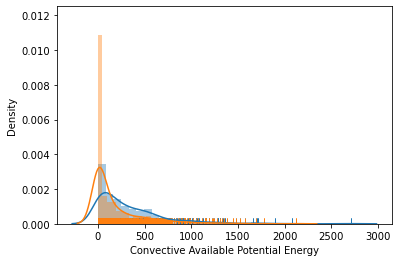

In [5]:
cape = dataset['Convective Available Potential Energy']
status_hujan = dataset['hujan']

cape_hujan = copy.copy(cape)
cape_hujan[status_hujan == 0] = np.nan

cape_tidak_hujan = copy.copy(cape)
cape_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(cape_hujan, kde=True, rug=True)
#sns.displot(cape_tidak_hujan, kde=True, rug=True)
sns.distplot(cape_hujan, rug=True)
sns.distplot(cape_tidak_hujan, rug=True)

<AxesSubplot:xlabel='K index', ylabel='Density'>

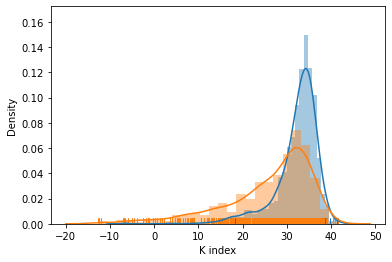

In [6]:
k_idx = dataset['K index']
status_hujan = dataset['hujan']

k_idx_hujan = copy.copy(k_idx)
k_idx_hujan[status_hujan == 0] = np.nan

k_idx_tidak_hujan = copy.copy(k_idx)
k_idx_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(k_idx_hujan, kde=True, rug=True)
#sns.displot(k_idx_tidak_hujan, kde=True, rug=True)
sns.distplot(k_idx_hujan, rug=True)
sns.distplot(k_idx_tidak_hujan, rug=True)

<AxesSubplot:xlabel='Cross totals index', ylabel='Density'>

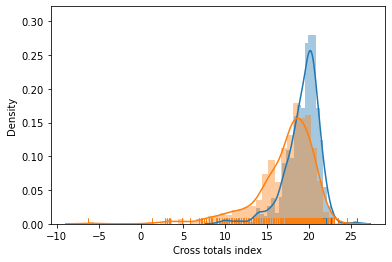

In [7]:
c_tot = dataset['Cross totals index']
status_hujan = dataset['hujan']

c_tot_hujan = copy.copy(c_tot)
c_tot_hujan[status_hujan == 0] = np.nan

c_tot_tidak_hujan = copy.copy(c_tot)
c_tot_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(c_tot_hujan, kde=True, rug=True)
#sns.displot(c_tot_tidak_hujan, kde=True, rug=True)
sns.distplot(c_tot_hujan, rug=True)
sns.distplot(c_tot_tidak_hujan, rug=True)

<AxesSubplot:xlabel='Vertical totals index', ylabel='Density'>

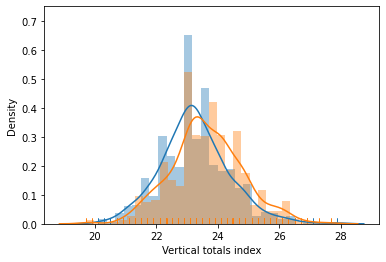

In [13]:
vt = dataset['Vertical totals index']
status_hujan = dataset['hujan']

vt_hujan = copy.copy(vt)
vt_hujan[status_hujan == 0] = np.nan

vt_tidak_hujan = copy.copy(vt)
vt_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(vt_hujan, kde=True, rug=True)
#sns.displot(vt_tidak_hujan, kde=True, rug=True)
sns.distplot(vt_hujan, rug=True)
sns.distplot(vt_tidak_hujan, rug=True)

<AxesSubplot:xlabel='Lifted index', ylabel='Density'>

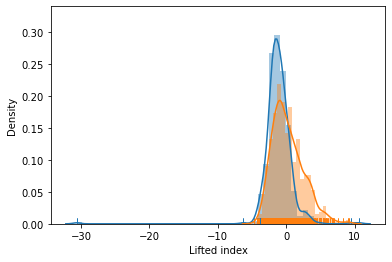

In [8]:
li = dataset['Lifted index']
status_hujan = dataset['hujan']

li_hujan = copy.copy(li)
li_hujan[status_hujan == 0] = np.nan

li_tidak_hujan = copy.copy(li)
li_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(li_hujan, kde=True, rug=True)
#sns.displot(li_tidak_hujan, kde=True, rug=True)
sns.distplot(li_hujan, rug=True)
sns.distplot(li_tidak_hujan, rug=True)

<AxesSubplot:xlabel='Showalter index', ylabel='Density'>

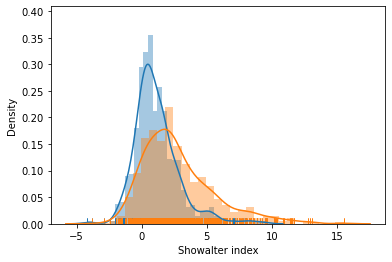

In [9]:
si = dataset['Showalter index']
status_hujan = dataset['hujan']

si_hujan = copy.copy(si)
si_hujan[status_hujan == 0] = np.nan

si_tidak_hujan = copy.copy(si)
si_tidak_hujan[status_hujan != 0] = np.nan

#sns.displot(si_hujan, kde=True, rug=True)
#sns.displot(si_tidak_hujan, kde=True, rug=True)
sns.distplot(si_hujan, rug=True)
sns.distplot(si_tidak_hujan, rug=True)

# Cek distribusi parameter untuk tiap class petir atau tidak petir

<AxesSubplot:xlabel='Convective Available Potential Energy', ylabel='Density'>

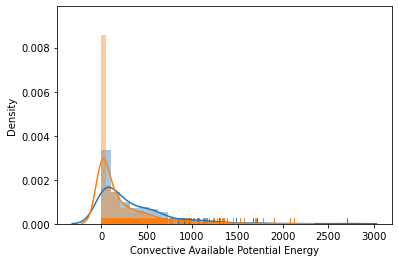

In [10]:
cape = dataset['Convective Available Potential Energy']
status_petir = dataset['petir']

cape_petir = copy.copy(cape)
cape_petir[status_petir == 0] = np.nan

cape_tidak_petir = copy.copy(cape)
cape_tidak_petir[status_petir != 0] = np.nan

#sns.displot(cape_petir, kde=True, rug=True)
#sns.displot(cape_tidak_petir, kde=True, rug=True)
sns.distplot(cape_petir, rug=True)
sns.distplot(cape_tidak_petir, rug=True)

<AxesSubplot:xlabel='K index', ylabel='Density'>

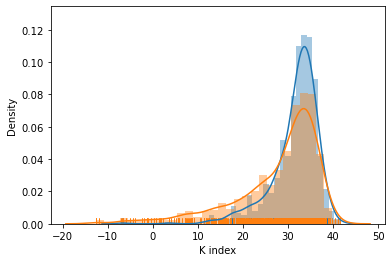

In [11]:
k_idx = dataset['K index']
status_petir = dataset['petir']

k_idx_petir = copy.copy(k_idx)
k_idx_petir[status_petir == 0] = np.nan

k_idx_tidak_petir = copy.copy(k_idx)
k_idx_tidak_petir[status_petir != 0] = np.nan

#sns.displot(k_idx_petir, kde=True, rug=True)
#sns.displot(k_idx_tidak_petir, kde=True, rug=True)
sns.distplot(k_idx_petir, rug=True)
sns.distplot(k_idx_tidak_petir, rug=True)

<AxesSubplot:xlabel='Cross totals index', ylabel='Density'>

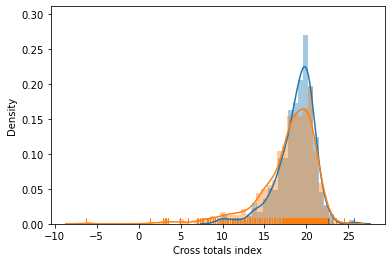

In [12]:
c_tot = dataset['Cross totals index']
status_petir = dataset['petir']

c_tot_petir = copy.copy(c_tot)
c_tot_petir[status_petir == 0] = np.nan

c_tot_tidak_petir = copy.copy(c_tot)
c_tot_tidak_petir[status_petir != 0] = np.nan

#sns.displot(c_tot_petir, kde=True, rug=True)
#sns.displot(c_tot_tidak_petir, kde=True, rug=True)
sns.distplot(c_tot_petir, rug=True)
sns.distplot(c_tot_tidak_petir, rug=True)

<AxesSubplot:xlabel='Vertical totals index', ylabel='Density'>

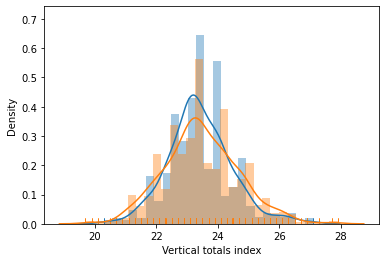

In [15]:
vt = dataset['Vertical totals index']
status_petir = dataset['petir']

vt_petir = copy.copy(vt)
vt_petir[status_petir == 0] = np.nan

vt_tidak_petir = copy.copy(vt)
vt_tidak_petir[status_petir != 0] = np.nan

#sns.displot(vt_petir, kde=True, rug=True)
#sns.displot(vt_tidak_petir, kde=True, rug=True)
sns.distplot(vt_petir, rug=True)
sns.distplot(vt_tidak_petir, rug=True)

<AxesSubplot:xlabel='Lifted index', ylabel='Density'>

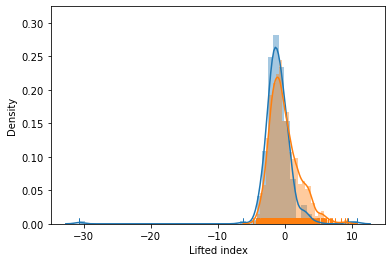

In [16]:
li = dataset['Lifted index']
status_petir = dataset['petir']

li_petir = copy.copy(li)
li_petir[status_petir == 0] = np.nan

li_tidak_petir = copy.copy(li)
li_tidak_petir[status_petir != 0] = np.nan

#sns.displot(li_petir, kde=True, rug=True)
#sns.displot(li_tidak_petir, kde=True, rug=True)
sns.distplot(li_petir, rug=True)
sns.distplot(li_tidak_petir, rug=True)

<AxesSubplot:xlabel='Showalter index', ylabel='Density'>

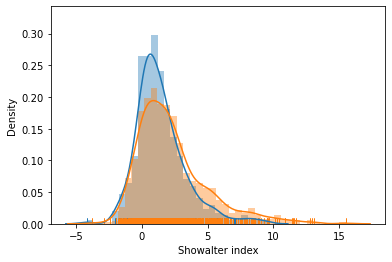

In [17]:
si = dataset['Showalter index']
status_petir = dataset['petir']

si_petir = copy.copy(si)
si_petir[status_petir == 0] = np.nan

si_tidak_petir = copy.copy(si)
si_tidak_petir[status_petir != 0] = np.nan

#sns.displot(si_petir, kde=True, rug=True)
#sns.displot(si_tidak_petir, kde=True, rug=True)
sns.distplot(si_petir, rug=True)
sns.distplot(si_tidak_petir, rug=True)

# Testing Running pakai SVM

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoLars, BayesianRidge
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, confusion_matrix

#setting
param_file = 'index_param.npy'
label_file = 'hujan_label.npy'
test_len = 400

all_param = np.load(param_file)
all_label = np.load(label_file)

param = []
label = []
for i in range(len(all_param)):
	if np.isnan(all_param[i]).any() or np.isnan(all_label[i]):
		continue
	param.append(all_param[i])
	label.append(all_label[i])

param = np.array(param)
label = np.array(label)
#print(param, np.shape(param))

param_training = param[:-test_len]
label_training = label[:-test_len]

param_test = param[-test_len:]
label_test = label[-test_len:]

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(param_training, label_training)

prediksi = clf.predict(param_test)
#print(prediksi)
print('akurasi', accuracy_score(label_test, prediksi))
#|        X      |predicted tidak_hujan| predicted hujan|
#|obs tidak hujan| correct_negative    | false_alarm    |
#|obs hujan      | miss                | hit            |
print('confusion matrix')
print('#|        X      |predicted tidak_hujan| predicted hujan|')
print('#|obs tidak hujan| correct_negative    | false_alarm    |')
print('#|obs hujan      | miss                | hit            |')
print(confusion_matrix(label_test, prediksi))


akurasi 0.785
confusion matrix
#|        X      |predicted tidak_hujan| predicted hujan|
#|obs tidak hujan| correct_negative    | false_alarm    |
#|obs hujan      | miss                | hit            |
[[273  17]
 [ 69  41]]
